<module 'matplotlib.pyplot' from '/Users/almaalvarado/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

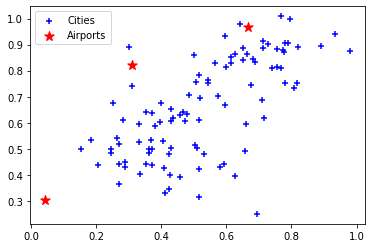

In [1]:
import random
import numpy as np
import math

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y)) 

import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

In [2]:
def objFunc(state, citySets):
    # for city in cities:
    # (x1 - city[0])**2 + (y1 - city[1])**2
    # (xi - xc)**2 + (y1 - yc)**2
    objVal = 0
    tempVal = 0
    for cities in citySets:
        for city in cities:
            objVal += (state[i]-city[0])**2 + (state[i+1] - city[1])**2
        tempVal += 2 #incrementing by 1 gives error 2 works
    return objVal


In [3]:
def calcGrad(airports, citySets):
    # grad : [df/dx1, df/y1, ..]
    # grad = [] * len(airports) * 2

    grad = []
    # [0, 0, 0, 0, 0, 0, 0] -- length
    # dfdx1 = 2(x - x_c)
    # grad.append(df/dx1)
    
    dfGradient = 0
    dxGradient = 0
    
    # https://realpython.com/python-enumerate/
    for i, airport in enumerate(airports):
        
        for j, cityinSet in enumerate(citySets[i]):
            
            # dfdx1 = 2(x - x_c)
            dfGradient = dfGradient + 2 * (airport[0] - cityinSet[0])
            dxGradient = dxGradient + 2 * (airport[1] - cityinSet[1])
            
        grad.append(dfGradient)
        grad.append(dxGradient)
        
    return grad

In [4]:
def distance(airport, city):
    # distance = math.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )
    distance = math.sqrt((airport[0] - city[0])**2 + (airport[1] - city[1])**2)
    
    return distance
    

In [5]:
def calcCitySets(airports, cities):
    # list of size == len(airports)
    # citySets: [[airport1Cities], [airport2Cities], [airport2Cities]]
    citySets = []

    for i in range(len(airports)):
        citySets.append([])
        
      # Create a new function to find closesAirport
    for city in cities:
        closestAirportIndex = 0
        #np.sqrt(np.dot(temp.T, temp))
        smallestDist = distance(airports[0], city)
        for i, airport in enumerate(airports[1:]):
            curr = distance(airport, city)
            if curr < smallestDist:
                closestAirportIndex = i + 1
                smallestDist = curr
            citySets[closestAirportIndex].append(city)
            # print(citySets)
    return citySets


In [6]:
# update current state until either (1) # of epochs or (2) % change within threshold
# gradient descent
def gradDescent(airports, cities):
    state = []
    for pair in airports:
        # append x coord
        state.append(pair[0])
        # append y cord
        state.append(pair[1])

    # state is stored within the airports list
    delta = .00009
    percentChange = 1

    # list of size 3, len(citySets) == 3
    citySets = calcCitySets(airports, cities)

    objValues = []
    objValues.append(objFunc(state, citySets))

    # for i in range(len(airports)):
    # citySets.append(calcCitySets(cities, airports))
    # numberofepochs = 0
    # epoch -- NOT USING EPOCHS USING DELTA
    # while numberofepochs < maxEpochs:
    # delta
    while percentChange > delta:
        # update state
        # state: [x1, y1, x2, y2, x3, y3]
        # calcGrad return: [df/dx1, df/y1, ..]

        # compute gradient

        gradVector = calcGrad(airports, citySets)

        # move state
        alpha = .000063
        # airports = airports - alpha * calcGrad(airports)
        for i in range(len(state)):
            state[i] = state[i] - alpha * gradVector[i]


        # calc new city sets
        citySets = calcCitySets(airports, cities)

        # store obj func value
        objValues.append(objFunc(state, citySets))

        # calc percent change
        currVal = objValues[-1]
        previousValue = objValues[-2]
        percentChange = abs((previousValue - currVal) / previousValue)


    return state, objValues

In [7]:
def plot(objValues):
    plt2 = plt.figure(2)
    plt.scatter(range(len(objValues)), objValues)

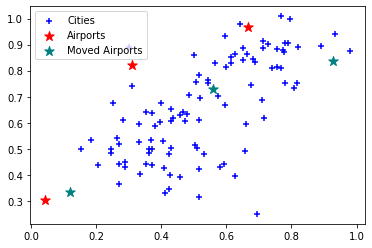

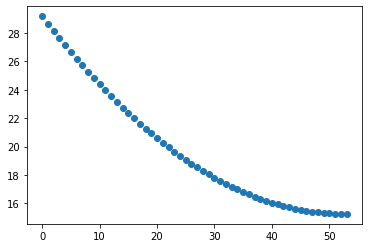

In [8]:
#Driver
states, objValues = gradDescent(airports, cities)

movedAirports = []
for i in range(0, len(states), 2):
    movedAirports.append([states[i],states[i+1]])

# Increase your alpha value
# And decrease your delta
#You need to convert states back to the same format as airports to us the code below
zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
zip_newA = zip(*movedAirports)
plt.scatter(*zip_newA, marker='*', color='teal', s=100, label='Moved Airports')
plt.legend()
plt

plot(objValues)